# The model : Learning place cells, grid cells and invariances with excitatory and inhibitory plasticity 

Simon Nikolaus Weber, Henning Sprekeler

https://elifesciences.org/articles/34560


$$r^{out}(x(t)) =[ \sum^{Ne}_{i=1} w_i^{E}(t)r_i^{E}(x(t))-\sum^{Ni}_{j=1} w_j^{I}(t)r_j^{I}(x(t)) ]$$

$$\delta w^{E}= \eta_E r^{E}(x)r^{out}(x)$$

$$r_i^P(x)=\alpha_p exp\big({-\frac{(x-\mu_i)^2}{2\sigma_p^2}}\big)$$


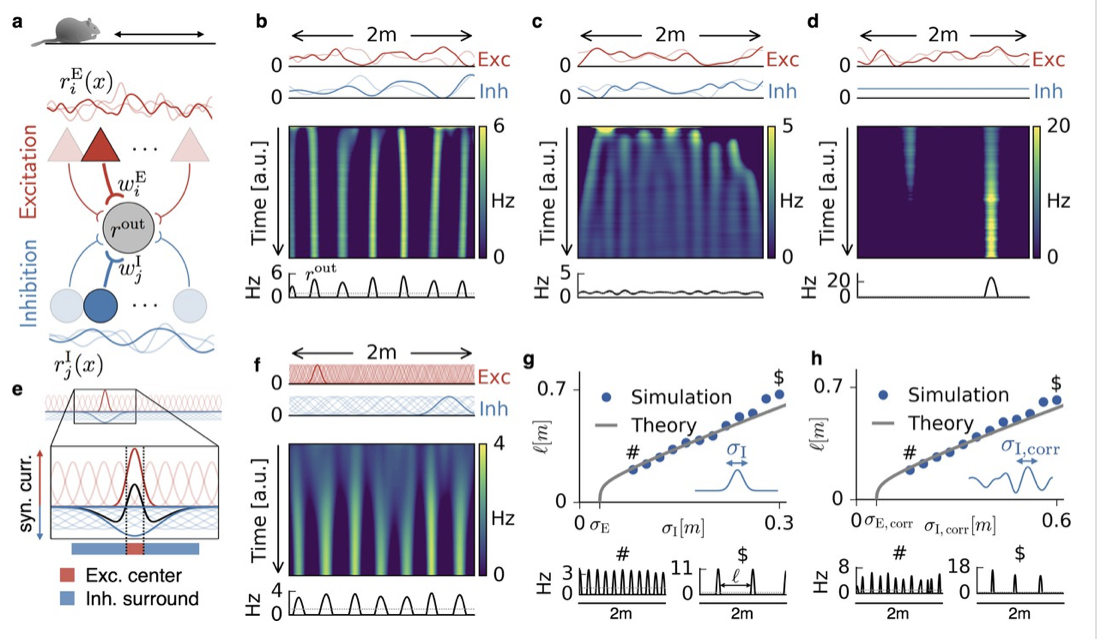

In [4]:
import sys
sys.path.append("../")
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from environments.environments.simple2d import Simple2D, Sargolini2006, Hafting2008,BasicSargolini2006
from models.weber_and_sprekeler import ExcInhPlasticity

In [2]:
data_path = "../environments/experiment_data/sargolini2006/"
env = BasicSargolini2006(data_path=data_path,
                                 time_step_size=0.1,
                                 agent_step_size=None)


        

../environments/experiment_data/behavioral_data.py:143: RuntimeWarning: invalid value encountered in true_divide
  head_direction = head_direction/np.sqrt(np.sum(head_direction**2, axis=1))[..., np.newaxis]


100%|██████████| 4900/4900 [00:01<00:00, 3123.38it/s]


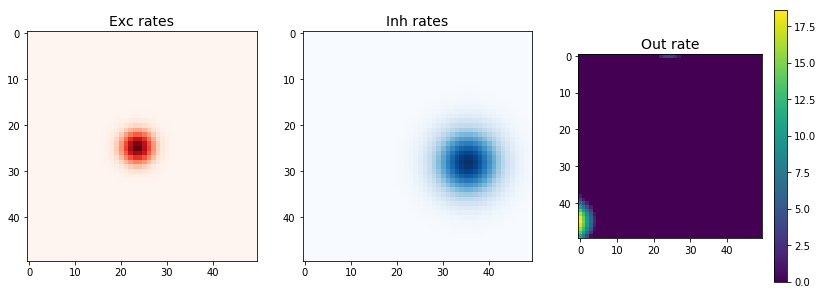

In [3]:
exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size = 0.1
    
agent = ExcInhPlasticity(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                                 sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=1,
                                 Nef=Nef, Nif=Nif, room_width=env.room_width, room_depth=env.room_depth,
                                 alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

agent.plot_rates()

  0%|          | 0/100000 [00:00<?, ?it/s]

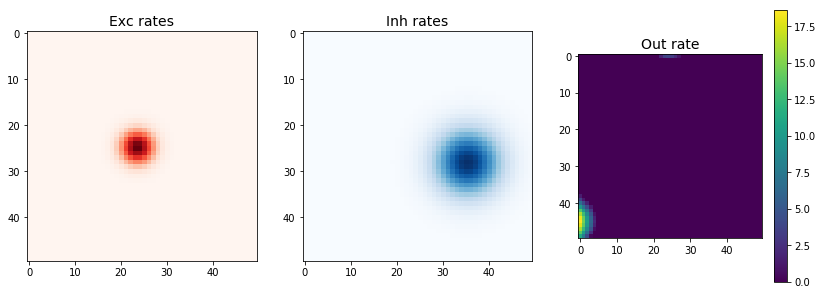

 10%|▉         | 9983/100000 [00:37<05:42, 263.04it/s]

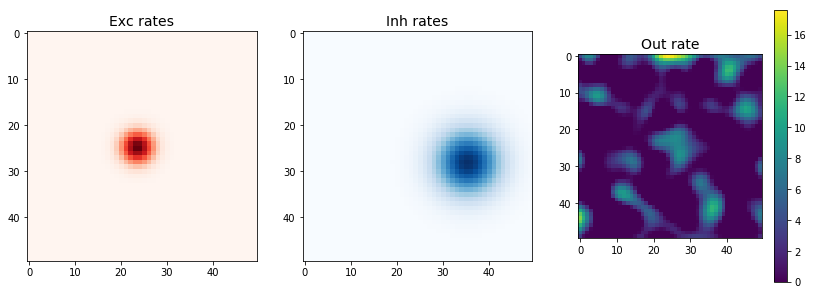

 20%|█▉        | 19993/100000 [01:20<05:24, 246.34it/s]

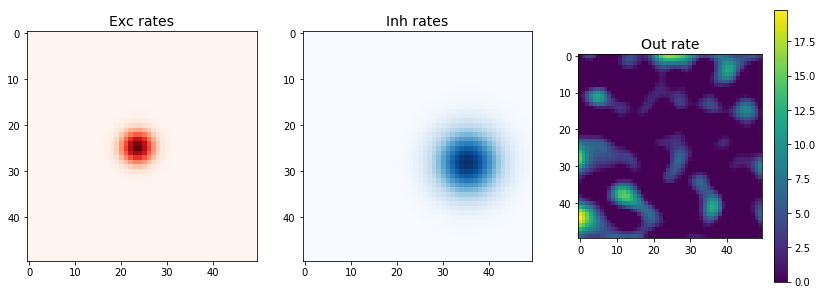

 30%|██▉       | 29993/100000 [02:05<04:12, 277.13it/s]

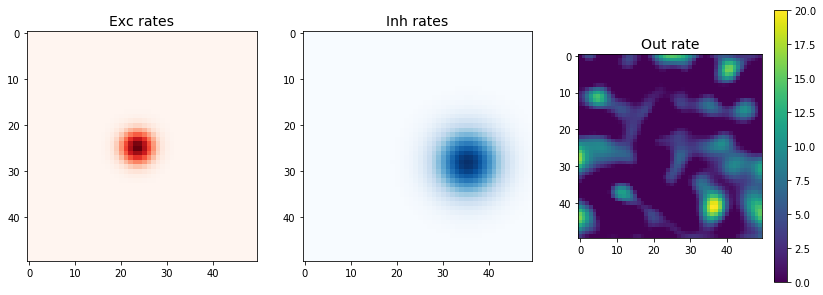

 40%|███▉      | 39976/100000 [02:42<03:50, 259.88it/s]

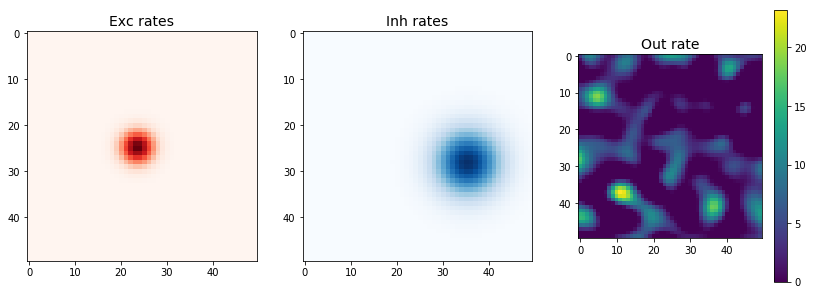

 50%|████▉     | 49986/100000 [03:20<03:02, 274.43it/s]

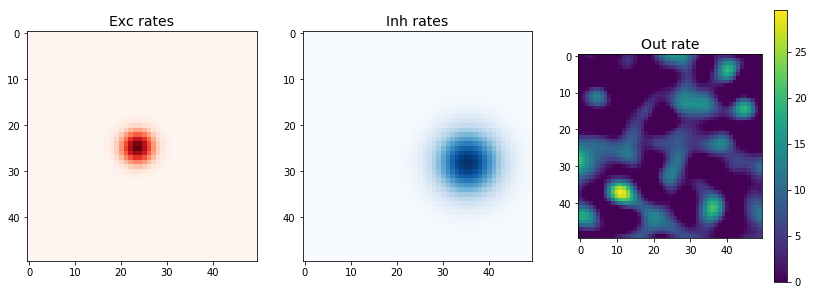

 60%|█████▉    | 59973/100000 [03:57<02:19, 287.42it/s]

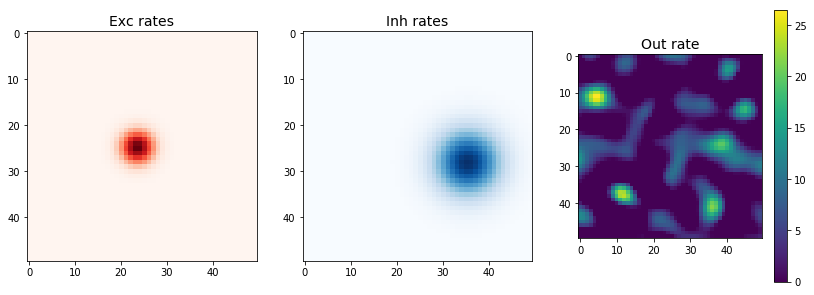

 70%|██████▉   | 69982/100000 [04:33<01:57, 254.59it/s]

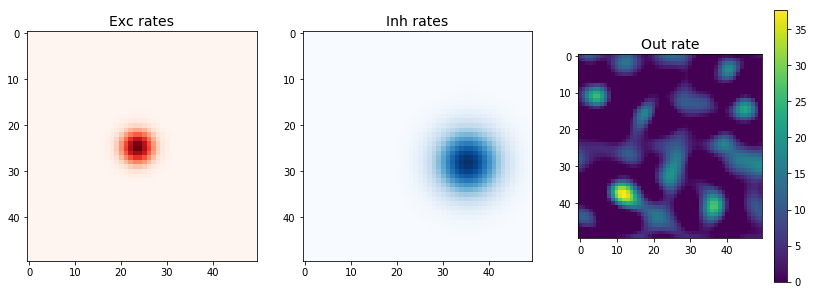

 80%|███████▉  | 79973/100000 [05:19<01:14, 270.26it/s]

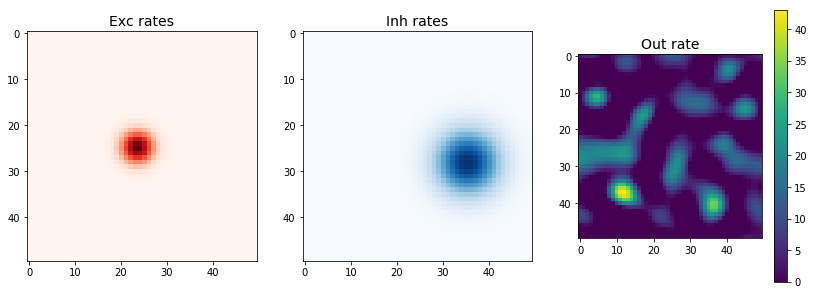

 90%|████████▉ | 89987/100000 [05:57<00:38, 261.45it/s]

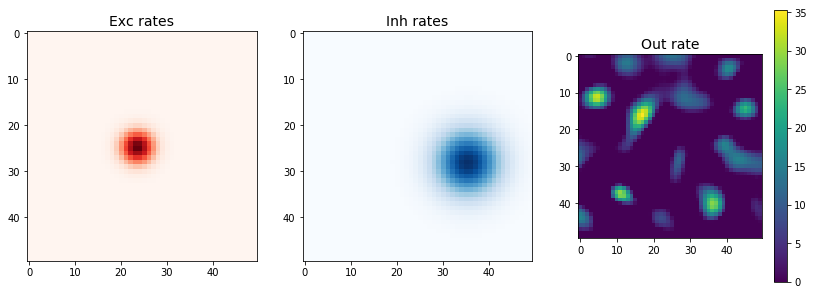

100%|██████████| 100000/100000 [06:37<00:00, 251.49it/s]


In [4]:
plot_every = 10000
total_iters = 0
n_steps = 100000

obs, state = env.reset()
#for i in tqdm(range(env.total_number_of_steps)):
for i in tqdm(range(n_steps)):
    # Observe to choose an action
    obs = obs[:2]
    action = agent.act(obs)
    # rate = agent.update()
    agent.update()
    # Run environment for given action
    obs, state, reward = env.step(action)
    total_iters += 1
    if i % plot_every == 0:
         agent.plot_rates()
         
                

[ 32.28176299 -29.72747824  -0.71510282   0.69901928]


No handles with labels found to put in legend.


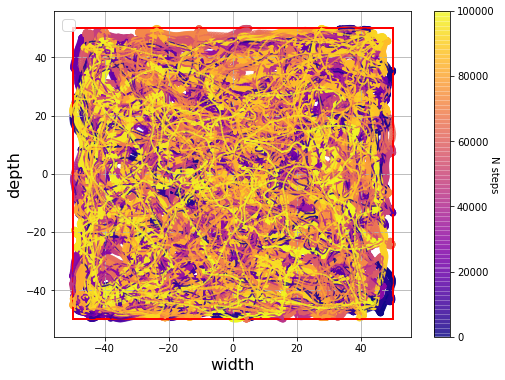

In [5]:
ax = env.plot_trajectory()
fontsize = 16
ax.grid()
ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
plt.show()



In [6]:
# Create an env
room_width = 10
room_depth = 10
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.5

# Init environment
envsimple = Simple2D(environment_name=env_name,
               room_width = room_width,
               room_depth = room_depth,
               time_step_size = time_step_size,
               agent_step_size = agent_step_size)

In [7]:
exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size = 0.1
agentsimple = ExcInhPlasticity(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                                 sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=1,
                                 Nef=Nef, Nif=Nif, room_width=envsimple.room_width, room_depth=envsimple.room_depth,
                                 alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)


100%|██████████| 4900/4900 [00:01<00:00, 2638.46it/s]


  0%|          | 0/50000 [00:00<?, ?it/s]

10


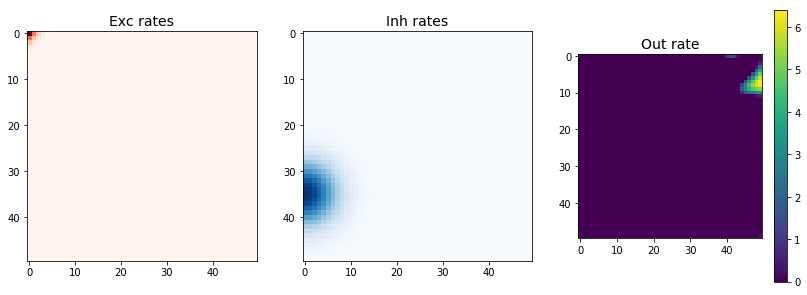

 10%|▉         | 4984/50000 [00:25<03:42, 202.10it/s]

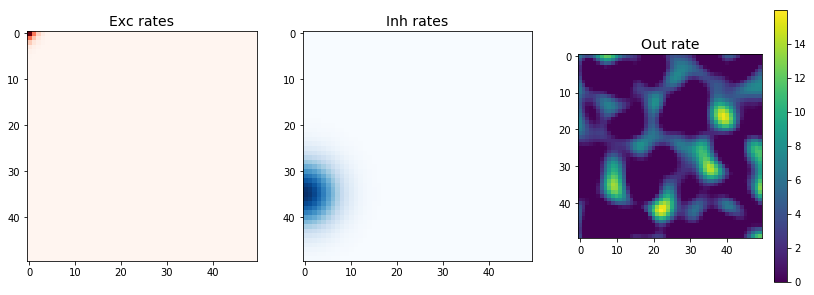

 20%|█▉        | 9996/50000 [00:49<02:55, 227.76it/s]

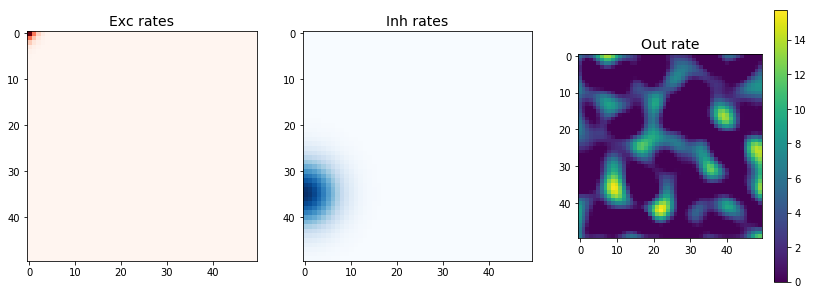

 30%|██▉       | 14978/50000 [01:15<02:38, 220.73it/s]

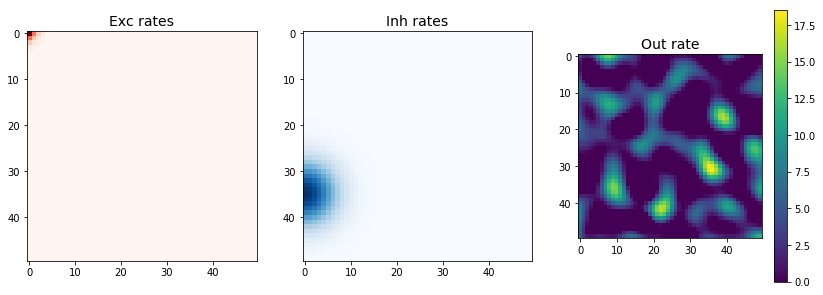

 40%|███▉      | 19984/50000 [01:38<02:19, 215.44it/s]

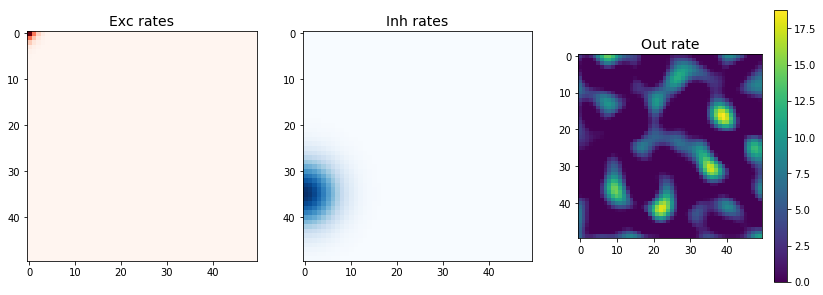

 50%|████▉     | 24980/50000 [02:03<01:50, 226.73it/s]

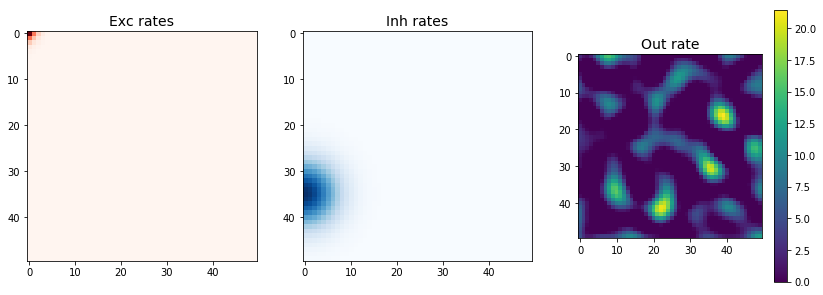

 60%|█████▉    | 29981/50000 [02:28<01:29, 222.51it/s]

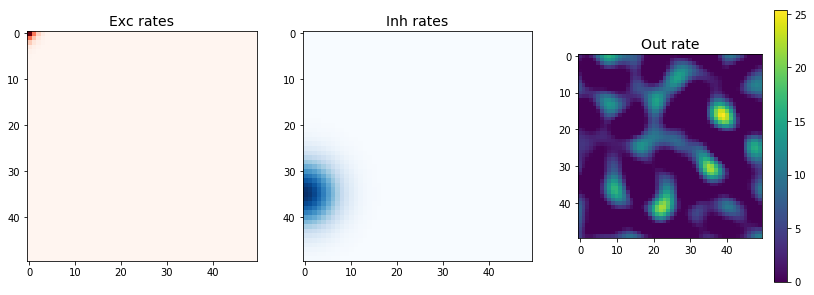

 70%|██████▉   | 34990/50000 [02:51<01:07, 220.80it/s]

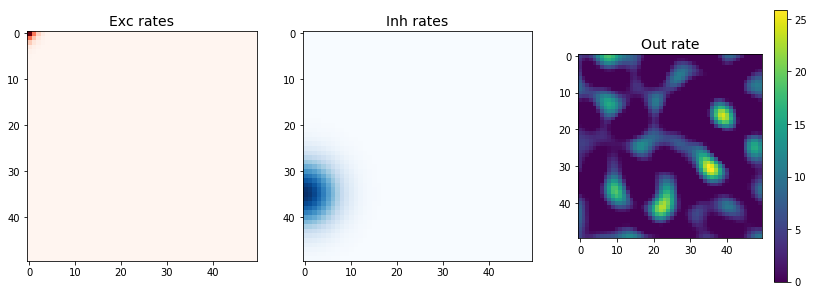

 80%|███████▉  | 39984/50000 [03:16<00:43, 229.36it/s]

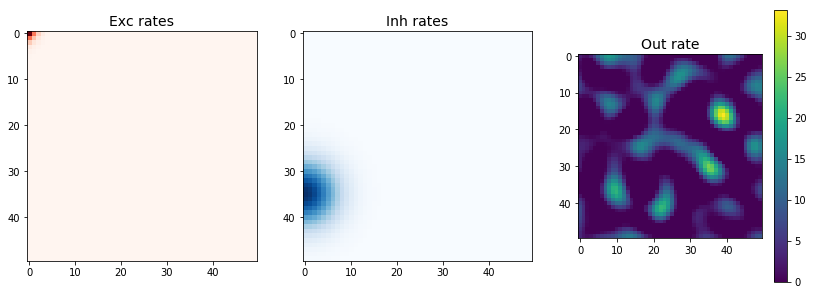

 90%|████████▉ | 44989/50000 [03:39<00:23, 209.62it/s]

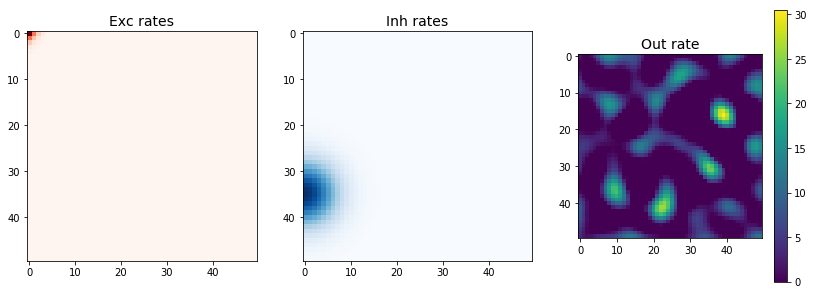

100%|██████████| 50000/50000 [04:05<00:00, 203.68it/s]


In [8]:
plot_every = 5000
total_iters = 0
n_steps = 50000
print(agentsimple.room_width)
obs, state = envsimple.reset()
for i in tqdm(range(n_steps)):
    # Observe to choose an action
    obs = obs[:2]
    action = agentsimple.act(obs)
    # rate = agent.update()
    agentsimple.update()
    # Run environment for given action
    obs, state, reward = envsimple.step(action)
    total_iters += 1
    if i % plot_every == 0:
        agentsimple.plot_rates()
        agentsimple.plot_rates(save_path="../model/figures/pre_processed_iter_"+str(i)+".pdf")
                

[0 0]


No handles with labels found to put in legend.


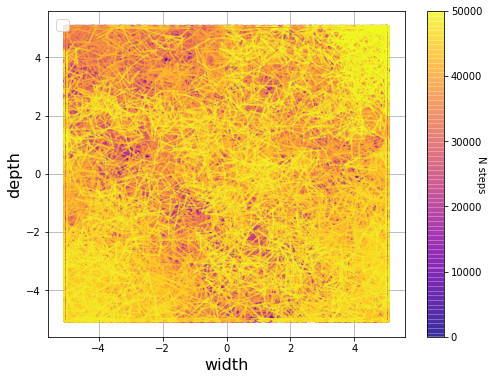

In [9]:
ax = envsimple.plot_trajectory()
fontsize = 16
ax.grid()
ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
plt.show()